# Time Series Forecasting - ARIMA

In [1]:
pip install -U setuptools

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np

Read Data

In [4]:
# import csv dataset
df=pd.read_csv('divvy-tripdata_cleaned.csv',index_col=1,parse_dates=True)

# make into dataframe
df2=pd.DataFrame(df)

# which columns to include alongside column acting as index
cols=[3]
df2=df2[df2.columns[cols]]

# printing shape of dataset and its head
print('Shape of data',df2.shape)
df2.head()

Shape of data (76000, 1)


,trip_duration
start_time,
2013-08-16 17:40:00,2729
2014-07-14 17:17:00,277
2014-06-19 18:04:00,566
2014-07-09 19:46:00,637
2014-06-27 16:19:00,161


Plot your data

<AxesSubplot:xlabel='start_time'>

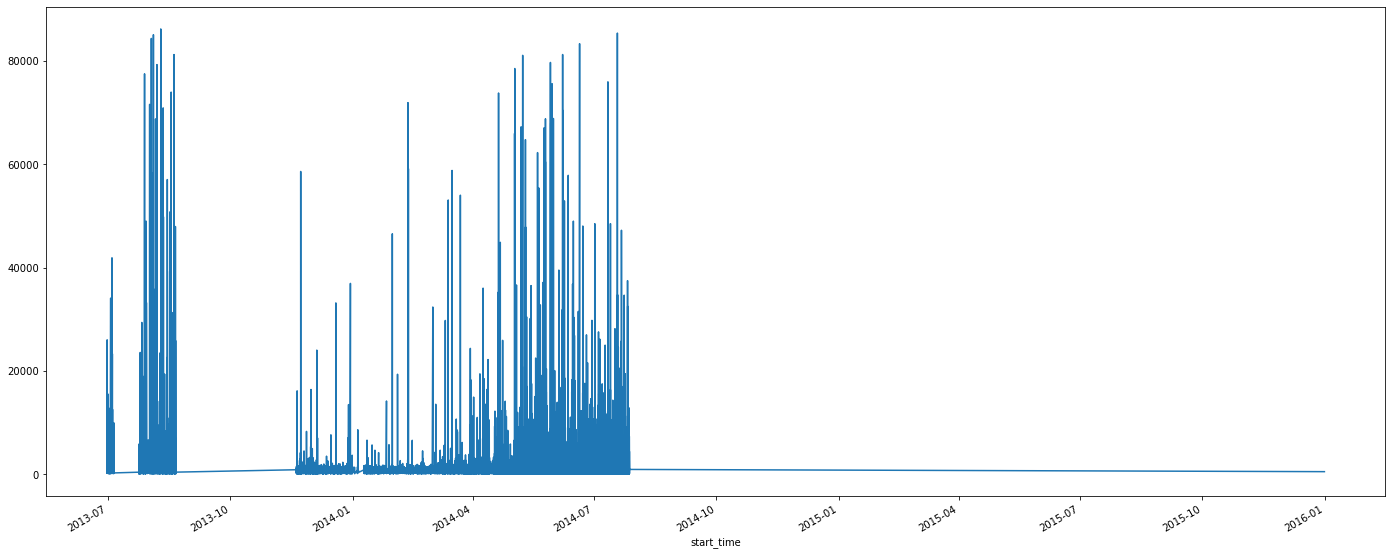

In [5]:
df2['trip_duration'].plot(figsize=(24,10))

Check for Stationarity

In [6]:
# performing "Augmented Dickey Fuller" test to check for stationarity of data

from statsmodels.tsa.stattools import adfuller

dftest=adfuller(df2['trip_duration'],autolag='AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ",dftest[1])
print("3. No. of Lags : ",dftest[2])
print("4. No. of Observations used for ADF Regression and Critical Value Calculation : ",dftest[3])
print("5. Critical Values :")
for key,val in dftest[4].items():
    print("\t",key, ": ",val)

1. ADF :  -275.94903092250775
2. P-Value :  0.0
3. No. of Lags :  0
4. No. of Observations used for ADF Regression and Critical Value Calculation :  75999
5. Critical Values :
	 1% :  -3.4304360474596383
	 5% :  -2.8615780314967068
	 10% :  -2.566790242857946


Figure out Order for ARIMA Model

In [7]:
from pmdarima import auto_arima
# ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [8]:
# calling the auto_arima() function
# Auto ARIMA is going to try for different combinations (like (0,1,0), (0,1,1), (0,1,2), etc.) 
# and for every order it is going to assign a score called the AIC
# the goal is to minimize the AIC (Akaike’s Information Criterion)

stepwise_fit=auto_arima(df2['trip_duration'],trace=True,suppress_warnings=True)

# performing step-wise search to minimize AIC score

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1392042.923, Time=16.50 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1392035.558, Time=1.42 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1392037.483, Time=4.44 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1392037.487, Time=4.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1408673.207, Time=0.83 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1392039.484, Time=8.64 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 35.992 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                76000
Model:                        SARIMAX   Log Likelihood             -696015.779
Date:                Thu, 08 Dec 2022   AIC                        1392035.558
Time:                        20:20:42   BIC                        1392054.035
Sample:                             0   HQIC                       1392041.235
                              - 76000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1136.1780     15.935     71.299      0.000    1104.945    1167.411
sigma2      5.274e+06   3087.682   1708.125      0.000    5.27e+06    5.28e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):         997956307.88
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               0.92   Skew:                            20.21
Prob(H) (two-sided):                  0.00   Kurtosis:                       562.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
from statsmodels.tsa.arima.model import ARIMA

Split Data into Training and Testing

In [10]:
print(df2.shape)
train=df2.iloc[:-7600]
test=df2.iloc[-7600:]
print(train.shape,test.shape)

(76000, 1)
(68400, 1) (7600, 1)


Train the Model

In [11]:
model=ARIMA(train['trip_duration'],order=(0,0,1))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          trip_duration   No. Observations:                68400
Model:                 ARIMA(0, 0, 1)   Log Likelihood             -625532.509
Date:                Thu, 08 Dec 2022   AIC                        1251071.017
Time:                        20:21:01   BIC                        1251098.417
Sample:                             0   HQIC                       1251079.477
                              - 68400                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1133.4162     16.378     69.205      0.000    1101.317    1165.516
ma.L1         -0.0008      0.006     -0.129      0.897      -0.012       0.011
sigma2       5.14e+06   3109.608   1652.993      0.000    5.13e+06    5.15e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):         931446372.87
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                            20.29
Prob(H) (two-sided):                  0.00   Kurtosis:                       573.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
model=ARIMA(train['trip_duration'],order=(0,1,0))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          trip_duration   No. Observations:                68400
Model:                 ARIMA(0, 1, 0)   Log Likelihood             -649254.676
Date:                Thu, 08 Dec 2022   AIC                        1298511.351
Time:                        20:21:15   BIC                        1298520.485
Sample:                             0   HQIC                       1298514.171
                              - 68400                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.029e+07   4630.216   2221.820      0.000    1.03e+07    1.03e+07
===================================================================================
Ljung-Box (L1) (Q):               17045.76   Jarque-Bera (JB):         234223521.53
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                            -0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                       289.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
model=ARIMA(train['trip_duration'],order=(1,1,1))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          trip_duration   No. Observations:                68400
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -625528.902
Date:                Thu, 08 Dec 2022   AIC                        1251063.803
Time:                        20:21:47   BIC                        1251091.202
Sample:                             0   HQIC                       1251072.263
                              - 68400                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0007      0.006     -0.124      0.902      -0.012       0.011
ma.L1         -1.0000      0.000  -3176.112      0.000      -1.001      -0.999
sigma2      5.141e+06   8.36e-11   6.15e+16      0.000    5.14e+06    5.14e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):         931158830.95
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                            20.29
Prob(H) (two-sided):                  0.00   Kurtosis:                       573.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

Make Predictions on Test Set

In [14]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,type='levels')
print(pred)
# pred.index=df.index[start:end-1]
# print(pred)

68400    1133.884930
68401    1133.401711
68402    1133.402060
68403    1133.402060
68404    1133.402060
            ...     
75995    1133.402060
75996    1133.402060
75997    1133.402060
75998    1133.402060
75999    1133.402060
Name: predicted_mean, Length: 7600, dtype: float64


<AxesSubplot:xlabel='start_time'>

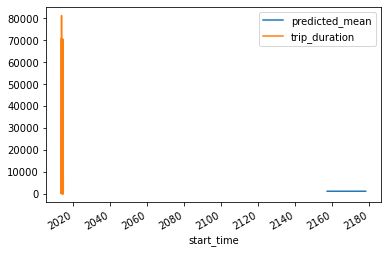

In [15]:
pred.plot(legend=True)
test['trip_duration'].plot(legend=True)

In [16]:
test['trip_duration'].mean()

1161.0343421052632

In [17]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['trip_duration']))
print(rmse)

2546.034108546844


In [18]:
model2=ARIMA(df2['trip_duration'],order=(1,0,0))
model2=model2.fit()
df2.tail()

,trip_duration
start_time,
2013-08-01 19:52:00,958
2014-07-07 22:41:00,844
2013-11-23 09:05:00,1409
2014-03-10 14:19:00,809
2014-03-11 13:56:00,1885


For Future Dates

In [19]:
index_future_dates=pd.date_range(start='02/26/2014 07:28:00 PM',end='2016/02/10 07:28:00 PM')
print(index_future_dates)
pred=model2.predict(start=len(df2),end=len(df2)+714,type='levels').rename('ARIMA Predictions')
# print(comp_pred)
pred.index=index_future_dates
# print(comp_pred)

DatetimeIndex(['2014-02-26 19:28:00', '2014-02-27 19:28:00',
               '2014-02-28 19:28:00', '2014-03-01 19:28:00',
               '2014-03-02 19:28:00', '2014-03-03 19:28:00',
               '2014-03-04 19:28:00', '2014-03-05 19:28:00',
               '2014-03-06 19:28:00', '2014-03-07 19:28:00',
               ...
               '2016-02-01 19:28:00', '2016-02-02 19:28:00',
               '2016-02-03 19:28:00', '2016-02-04 19:28:00',
               '2016-02-05 19:28:00', '2016-02-06 19:28:00',
               '2016-02-07 19:28:00', '2016-02-08 19:28:00',
               '2016-02-09 19:28:00', '2016-02-10 19:28:00'],
              dtype='datetime64[ns]', length=715, freq='D')


<AxesSubplot:>

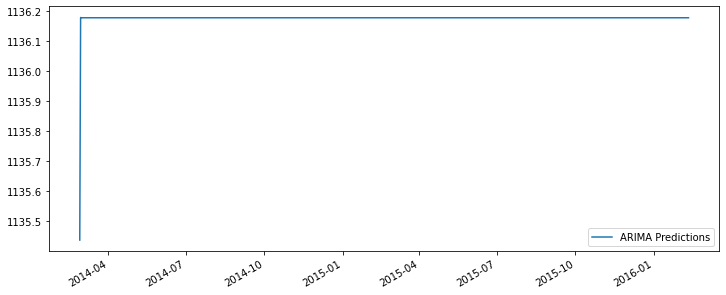

In [20]:
pred.plot(figsize=(12,5),legend=True)